In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost fastapi uvicorn pydantic joblib python-multipart


Active code page: 1252
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# Load RAW Excel file
df = pd.read_excel(r"C:\Users\satya\Downloads\Casestudy 1\Task\data\raw\Case Study 1 Data.xlsx")

df.head()


,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price
0,SI_000001,CityA,3974.0,2.0,2.0,2007.0,Good,Single Family,2020-11-02,324000.0
1,SI_000002,CityA,1660.0,2.0,3.0,1934.0,Good,Single Family,2022-10-23,795000.0
2,SI_000003,CityC,2094.0,2.0,2.0,1950.0,Good,Single Family,2020-11-30,385000.0
3,SI_000004,CityB,1930.0,2.0,3.0,1905.0,Good,Single Family,2021-12-09,651000.0
4,SI_000005,CityB,1895.0,5.0,2.0,1936.0,New,Single Family,2024-10-30,1878000.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Property ID  247172 non-null  object        
 1   Location     247172 non-null  object        
 2   Size         244701 non-null  float64       
 3   Bedrooms     238769 non-null  float64       
 4   Bathrooms    240499 non-null  float64       
 5   Year Built   234567 non-null  float64       
 6   Condition    236544 non-null  object        
 7   Type         247172 non-null  object        
 8   Date Sold    247172 non-null  datetime64[ns]
 9   Price        241735 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 18.9+ MB


In [5]:
df.isnull().sum()


Property ID        0
Location           0
Size            2471
Bedrooms        8403
Bathrooms       6673
Year Built     12605
Condition      10628
Type               0
Date Sold          0
Price           5437
dtype: int64

In [6]:
df.describe(include='all')


,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price
count,247172,247172,244701.000000,238769.000000,240499.000000,234567.000000,236544,247172,247172,2.417350e+05
unique,247172,4,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,TO_100000,CityC,NaN,NaN,NaN,NaN,Good,Townhouse,NaN,NaN
freq,1,62082,NaN,NaN,NaN,NaN,94629,100000,NaN,NaN
mean,NaN,NaN,2402.547664,3.000457,2.002823,1961.429191,NaN,NaN,2022-07-02 05:00:11.127473664,4.660883e+05
min,NaN,NaN,800.000000,1.000000,1.000000,1900.000000,NaN,NaN,2020-01-01 00:00:00,2.600000e+04
25%,NaN,NaN,1603.000000,2.000000,1.000000,1931.000000,NaN,NaN,2021-04-02 00:00:00,3.000000e+05
50%,NaN,NaN,2404.000000,3.000000,2.000000,1961.000000,NaN,NaN,2022-07-03 00:00:00,4.170000e+05
75%,NaN,NaN,3203.000000,4.000000,3.000000,1992.000000,NaN,NaN,2023-10-02 00:00:00,5.770000e+05
max,NaN,NaN,3999.000000,5.000000,3.000000,2023.000000,NaN,NaN,2024-12-31 00:00:00,2.223000e+06


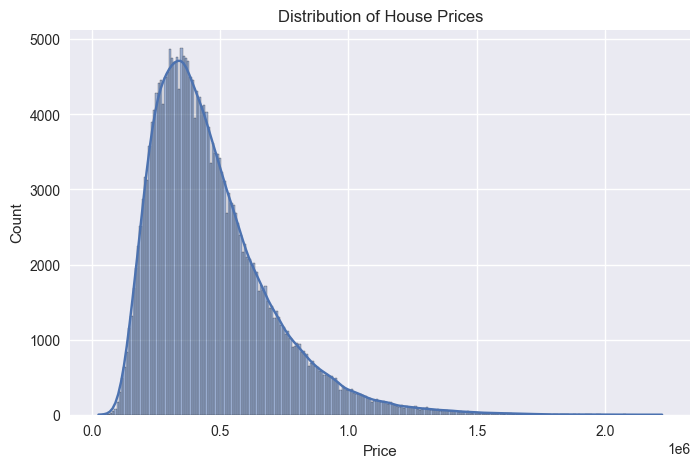

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


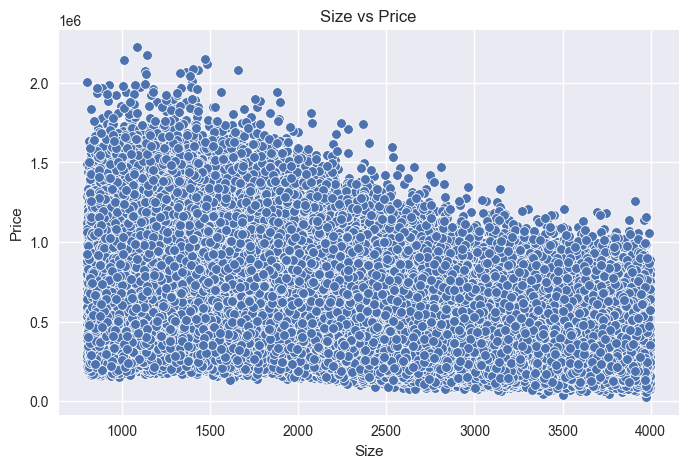

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Size", y="Price")
plt.title("Size vs Price")
plt.show()


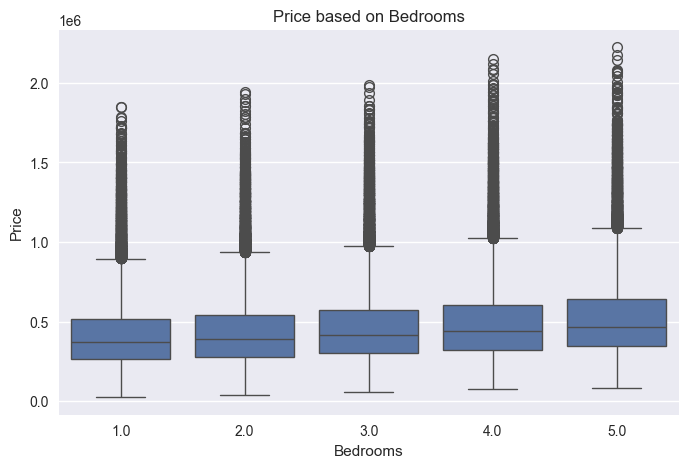

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Bedrooms", y="Price")
plt.title("Price based on Bedrooms")
plt.show()


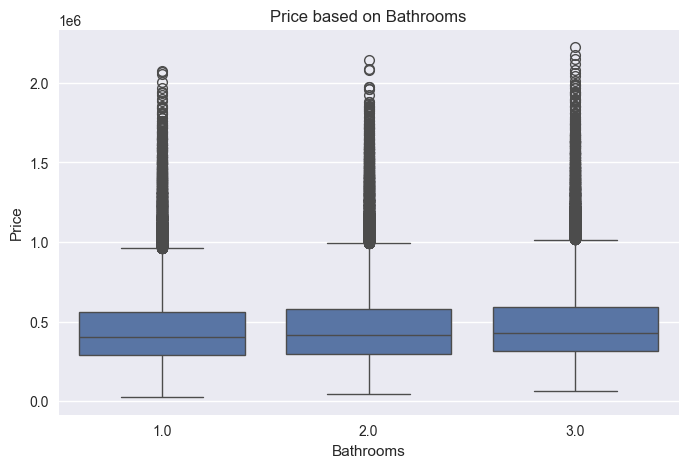

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Bathrooms", y="Price")
plt.title("Price based on Bathrooms")
plt.show()


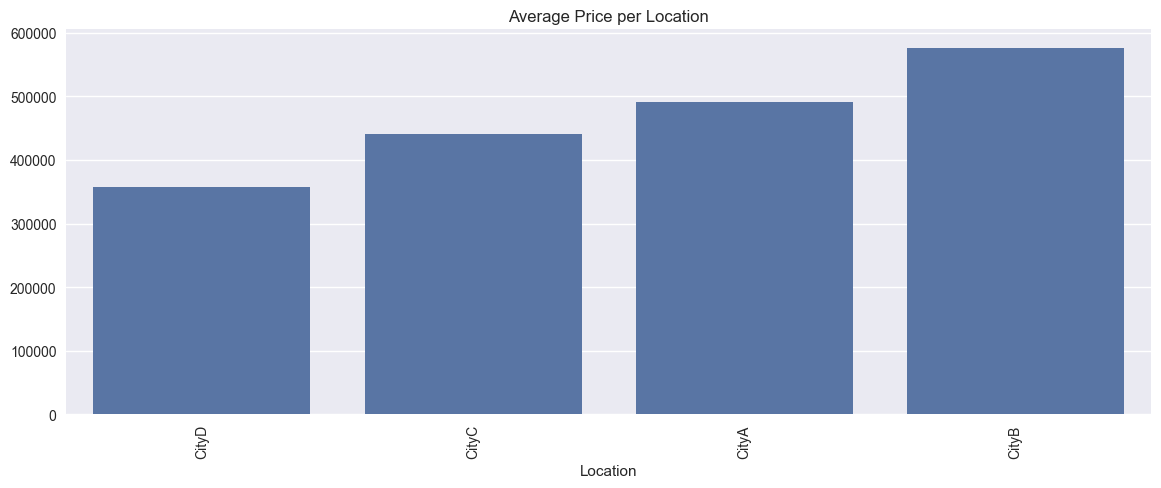

In [10]:
plt.figure(figsize=(14,5))
avg_loc_price = df.groupby("Location")["Price"].mean().sort_values()

sns.barplot(x=avg_loc_price.index, y=avg_loc_price.values)
plt.xticks(rotation=90)
plt.title("Average Price per Location")
plt.show()


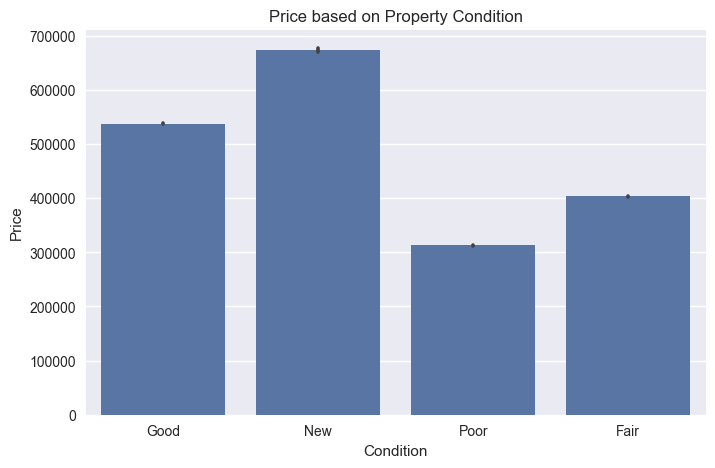

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Condition", y="Price")
plt.title("Price based on Property Condition")
plt.show()


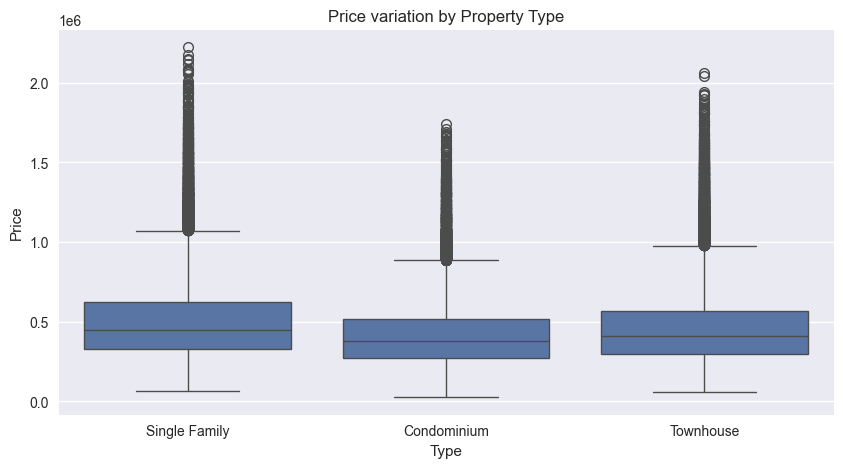

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Type", y="Price")
plt.title("Price variation by Property Type")
plt.show()


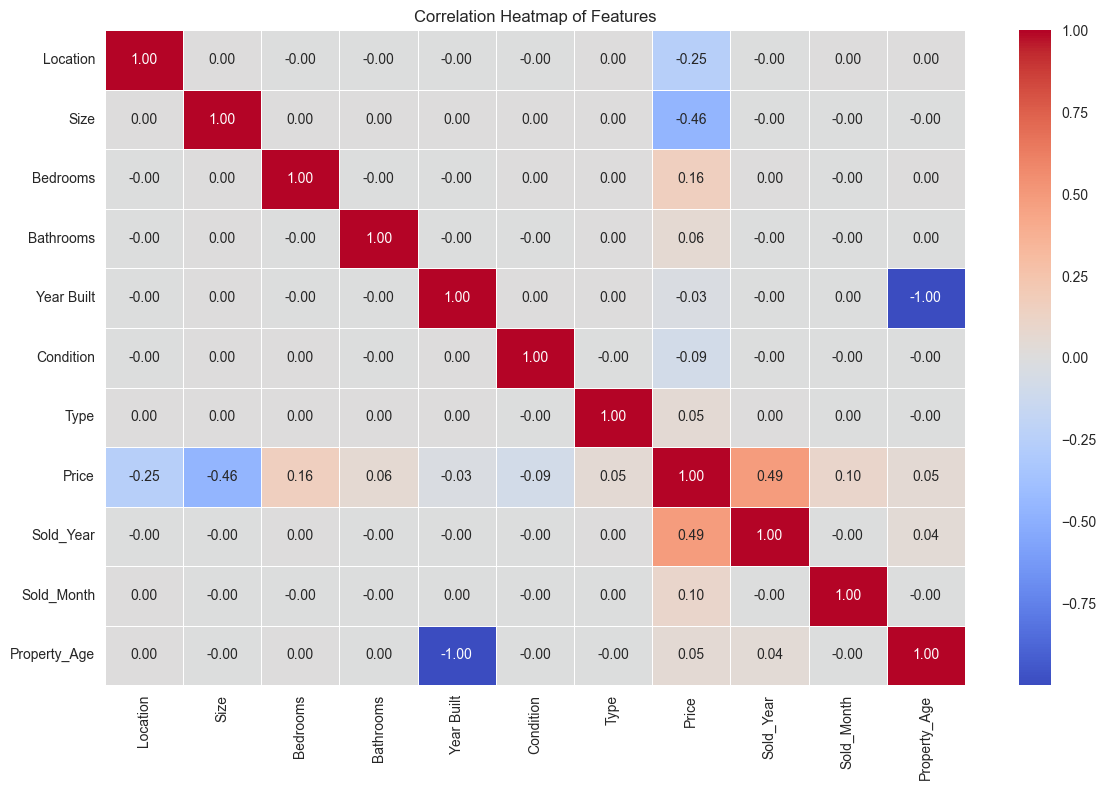

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r"C:\Users\satya\Downloads\Casestudy 1\Task\artifacts\processed_data.csv")

plt.figure(figsize=(12,8))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()


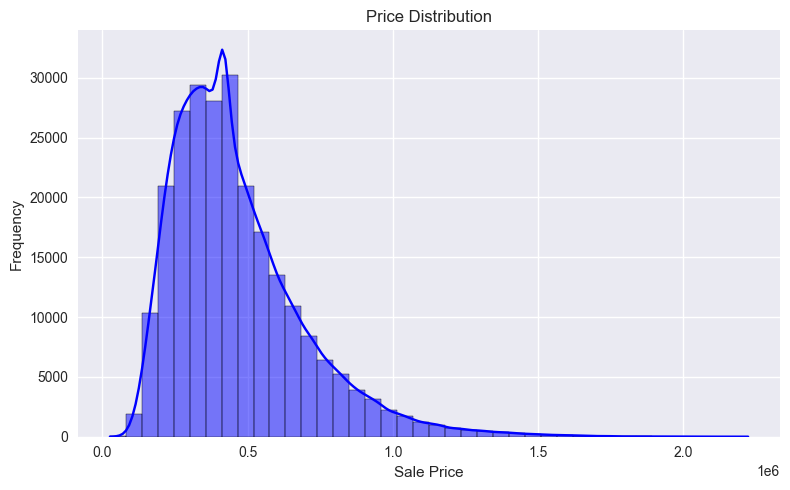

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv(r"C:\Users\satya\Downloads\Casestudy 1\Task\artifacts\processed_data.csv")

plt.figure(figsize=(8,5))
sns.histplot(df["Price"], kde=True, bins=40, color="blue")
plt.title("Price Distribution")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
